<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Building a Model in Kaggle</h1>

Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

**MBAN-DD**<br>
**Business Challenge 2**<br>
**A1: Python Analysis**<br>
**Team 7**<br>
/kaggle/input/house-prices-advanced-regression-techniques
<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Introduction<br>

The real estate market is a complex and dynamic system, where various factors come into play when determining the price of a property. Predicting the value of a home accurately is a challenging task that requires careful analysis of various features and factors. In this paper, the objective of the analysis is to predict the final price of each home in the Ames Housing dataset, using advanced regression techniques such as random forest and gradient boosting, as well as creative feature engineering. The Ames Housing dataset is a popular and challenging dataset in the machine learning community, consisting of 79 features describing various aspects of residential homes in Ames, Iowa. The goal is to achieve high accuracy in predicting the home prices while also providing 3 actionable insights that can help real estate agents and homeowners make informed decisions.

This paper, will demonstrate the effectiveness of advanced regression techniques and feature engineering in predicting home prices accurately and providing valuable insights for the real estate market.

In [1]:
# importing library which we need in this analysis
import pandas            as pd  # import pandas
import matplotlib.pyplot as plt # import pyplot
import seaborn           as sns # import seaborn
import numpy             as np  # import numpy


# importing model types
import sklearn.linear_model                            # import sklearn linear model 
from sklearn.tree     import DecisionTreeRegressor     # import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor     # import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor # import GradientBoostingRegressor 
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

# importing train_test_split, RandomizedSearchCV and GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from scipy import stats
from scipy.stats import norm, skew 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
# importing additional libraries
import statsmodels.formula.api as smf # predictive modeling with nice outputs


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br><br>
Make sure to tell Python the path to your training data. If you have no idea what a path is, look to the left and find and hover over <em>Data&nbsp;>&nbsp;Input&nbsp;>&nbsp;house-prices-advanced-regression-techniques</em>. A button should appear allowing you to copy the path to your clipboard.<br>

In [3]:
# # importing the training dataset
# path             = "/kaggle/input/house-prices-advanced-regression-techniques/"
# training_dataset = "train.csv"


# # reading in the .csv file with pandas
# housing_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)

housing_train = pd.read_csv('./train.csv')

# checking basic info about the dataset
housing_train.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
The test set is also available. Notice that there is no data for SalePrice (y-variable) in the test set. This is intentional.<br>

In [4]:
# # importing the training dataset
# path             = "/kaggle/input/house-prices-advanced-regression-techniques/"
# testing_dataset  = 'test.csv'

# # importing the testing dataset
# housing_test = pd.read_csv(filepath_or_buffer = path + testing_dataset)

housing_test = pd.read_csv('./test.csv')

# checking basic info about the dataset
housing_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

_____________________
## Exploring the data
### Checking the correlation of the features with the dependent variable the SalePrice<br>

In [5]:
# instantiating a correlation matrix
housing_corr = housing_train.corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
housing_corr.loc[ : , 'SalePrice' ].apply(func = abs).sort_values(ascending = False)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.35
OpenPorchSF      0.32
WoodDeckSF       0.32
2ndFlrSF         0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
KitchenAbvGr     0.14
EnclosedPorch    0.13
ScreenPorch      0.11
PoolArea         0.09
MSSubClass       0.08
OverallCond      0.08
MoSold           0.05
3SsnPorch        0.04
YrSold           0.03
LowQualFinSF     0.03
Id               0.02
MiscVal          0.02
BsmtHalfBath     0.02
BsmtFinSF2       0.01
Name: SalePrice, dtype: float64

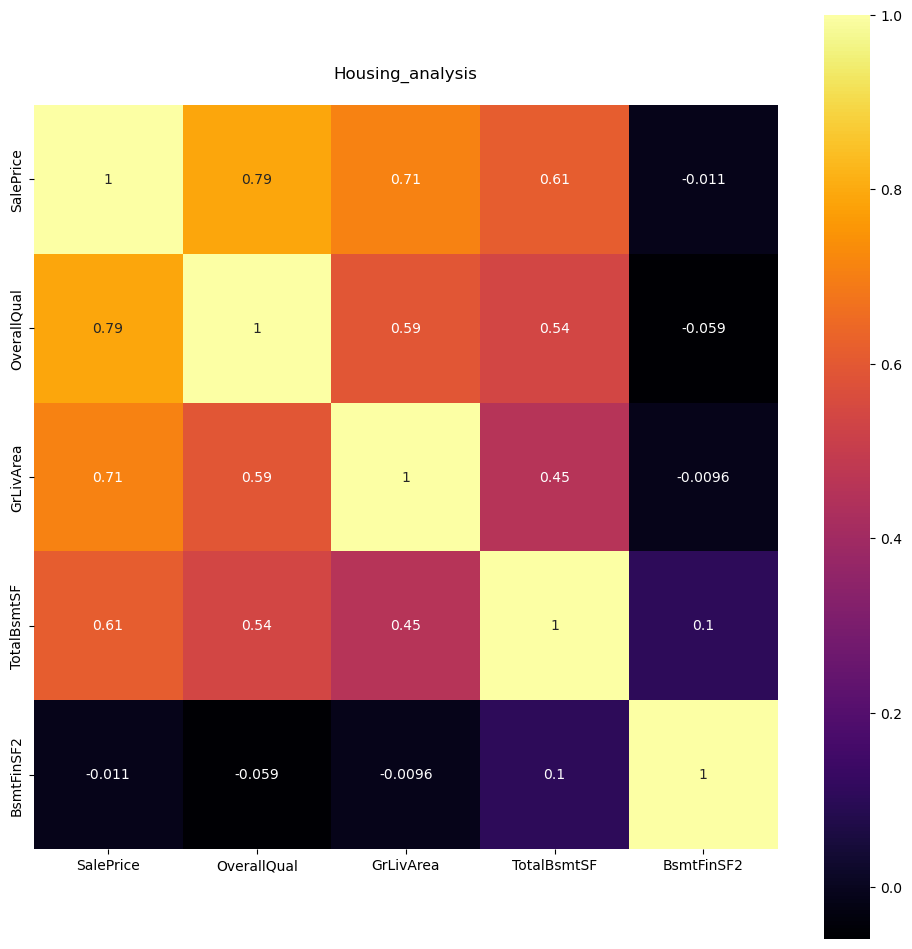

In [6]:
# creat heatmap
fig, ax = plt.subplots( figsize = (12,12))
sns.heatmap(data = housing_train[['SalePrice','OverallQual','GrLivArea','TotalBsmtSF','BsmtFinSF2' ]].corr(),
           cmap = 'inferno',
           square = True,
           annot = True,
           linecolor = 'black')
plt.title(label = """
Housing_analysis
""")

plt.show(block = True)

#### Data Visualization 1
This is the heatmap which showing the correlation between sales price and each column. 
Heatmap show us light color has higher correlation and dark color mean lower correlation between each columns.
Focusing on sales price, OverallQuual has 0.79, GrLivArea has 0.71, TotalBsmtSF has 0.61, BsmtFinSF2 has -0.011as correlation. 
Data is telling us OverallQuual has the highest correlation and GrLivArea also has relatively higher correlation between sales price.
On the other hands, TotalBsmtSF has relatively lower correlation between sales price and that has negative relationship with that.
Correlation map gave us the insight how each columns affect the sales price and it can work as basic standard. 

### Visualization of a few highly correlated features with SalePrice

/var/folders/5t/3hyc_jv11vzdszkpg_b7yhqm0000gn/T/ipykernel_22122/265842873.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


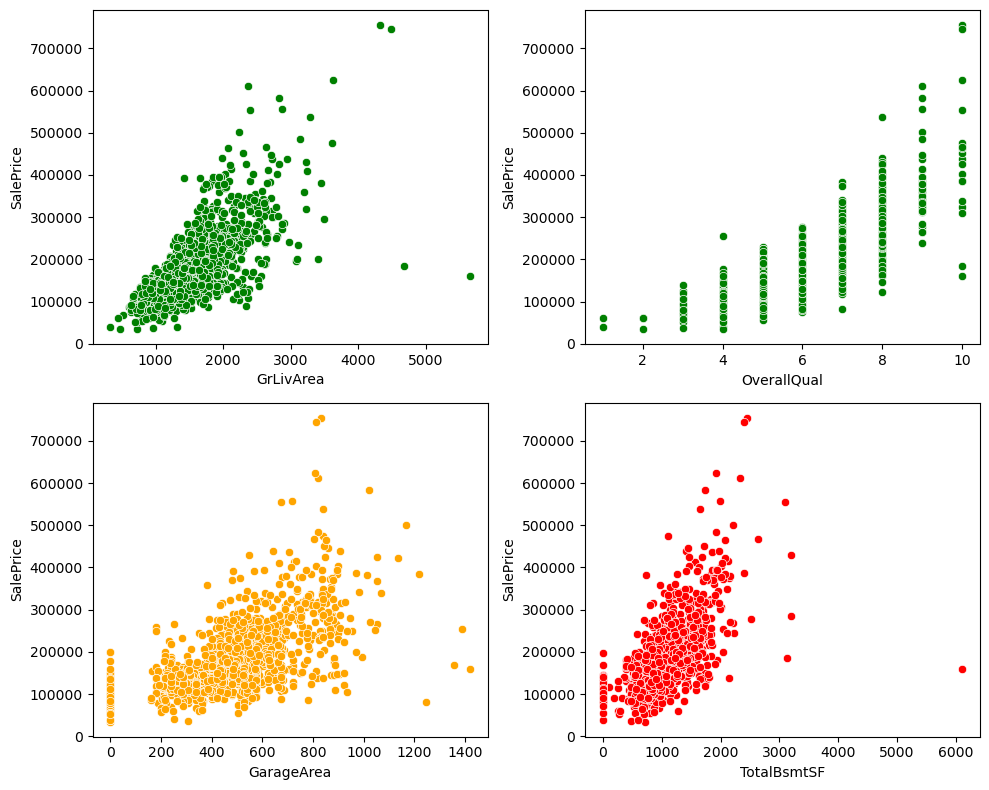

/var/folders/5t/3hyc_jv11vzdszkpg_b7yhqm0000gn/T/ipykernel_22122/265842873.py:78: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


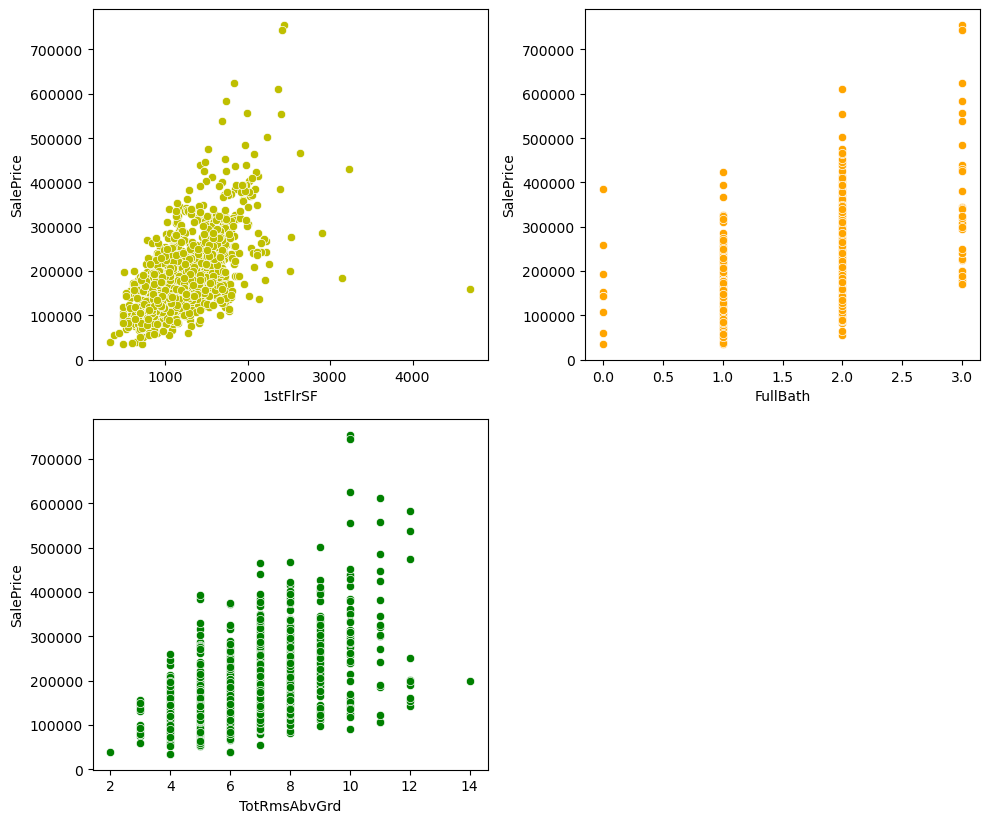

In [7]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = housing_train['GrLivArea'],
                y = housing_train['SalePrice'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'GrLivArea')
plt.ylabel(ylabel = 'SalePrice')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = housing_train['OverallQual'],
                y = housing_train['SalePrice'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'OverallQual')
plt.ylabel(ylabel = 'SalePrice')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = housing_train['GarageArea'],
                y = housing_train['SalePrice'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'GarageArea')
plt.ylabel(ylabel = 'SalePrice')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = housing_train['TotalBsmtSF'],
                y = housing_train['SalePrice'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'TotalBsmtSF')
plt.ylabel(ylabel = 'SalePrice')


# cleaning up the layout, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = housing_train['1stFlrSF'],
                y = housing_train['SalePrice'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = '1stFlrSF')
plt.ylabel(ylabel = 'SalePrice')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = housing_train['FullBath'],
                y = housing_train['SalePrice'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'FullBath')
plt.ylabel(ylabel = 'SalePrice')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = housing_train['TotRmsAbvGrd'],
                y = housing_train['SalePrice'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'TotRmsAbvGrd')
plt.ylabel(ylabel = 'SalePrice')


# cleaning up the layout, and displaying the results
plt.tight_layout()
plt.show()

#### Data Visualization 2
These graphs are showing us that how each feature affect the sales price. In the other words, these graphs are telling us how sales price would be changed by changing each feature.
1. In the first plot we see greater the gross area greater the price.
2. In the second we see greater the overall quality greater the price.
3. In the third we see a clustered section of garage area not improving as strongly as the other 2 but a general perception is that more the area more the price for garage too.
4. In the forth we see clustered on the lower side but a trend which is upward with the shape of the clustering, that more the total basement sf more the price of the house.
5. In this we see a trend similar to first where greater the 1st floor sf, greater the price.
6. Full Bath, the more the number of baths more is the price, though this is a count data and hence the distribution is a bit complex to read with just the scatterplot.
7. Again a count data but the general trend of more rooms above ground more the price.

### Missing Values in the train-data

In [8]:
# checking for null data in the columns for test-dataset

housing_train.loc[:, housing_train.isnull().sum() > 0].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Table 1
This table is showing us how many missing value each column include in train data. 
As you can see,  Garage Type include 81 missing value and columns related with Grade are also having 81 missing as well.
Pool IQC is having most amount to missing value and it was 1453.
On the other hands, Electrical is having one missing value and that means the data included in the column was relatively clean data.
Understanding how many missing value each columns having is important because that affect the result of analysis. 

In [9]:
housing_train.describe().round(decimals = 3) # descriptive stastics of the data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.50,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.61,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.00,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.75,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.50,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.25,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.00,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


#### Table 2

This table is showing statistical data for each column. 
For example, count row is showing how many numbers of value each column having and mean is showing average of the value for each column.
Focusing on Overall Qual, the minimum value is 1.0 and maximum value is 10.0. 
That means the all value included in Overall Qual has the value between 1.0 and 10.0
Overall Cond is having between 1.0 and 9.0 at the same logic as well.


________________________
## Cleaning data for Feature Engineering and analysis<br>

In [10]:
# filling the 'LotFrontage' missing values with the mean-train data

housing_train['LotFrontage']=housing_train['LotFrontage'].fillna(housing_train['LotFrontage'].mean())

# filling the 'LotFrontage' missing values with the mean-test data

housing_test['LotFrontage']=housing_test['LotFrontage'].fillna(housing_test['LotFrontage'].mean())

In [11]:
# filling the null values in the columns-train_dataset
housing_train['MasVnrArea'] = housing_train['MasVnrArea'].fillna(0)

# filling the null values in the columns-test_dataset
housing_test['MasVnrArea'] = housing_test['MasVnrArea'].fillna(0)

# filling the null values in the columns-train_dataset

housing_train['MasVnrType']=housing_train['MasVnrType'].fillna(housing_train['MasVnrType'].mode()[0])

# filling the null values in the columns-test_dataset

housing_test['MasVnrType']=housing_test['MasVnrType'].fillna(housing_test['MasVnrType'].mode()[0])

# filling the null values in the columns-train_dataset
housing_train[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath']] = housing_train[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)

# filling the null values in the columns-test_dataset
housing_test[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath']] = housing_test[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)

housing_train["GrLivArea"] = housing_train["GrLivArea"].fillna(housing_train["GrLivArea"].mean())

# filling the null values in the columns-test_dataset

housing_test["GrLivArea"] = housing_test["GrLivArea"].fillna(housing_test["GrLivArea"].mean())


housing_train["TotalBsmtSF"] = housing_train["TotalBsmtSF"].fillna(housing_train["TotalBsmtSF"].mean())

# filling the null values in the columns-test_dataset

housing_test["TotalBsmtSF"] = housing_test["TotalBsmtSF"].fillna(housing_test["TotalBsmtSF"].mean())


### Total Sqft house

In [12]:
# Total number of bathrooms-train_dataset
housing_train["TotalSqrtFeet"] = housing_train["GrLivArea"] + housing_train["TotalBsmtSF"]

In [13]:
# Total number of bathrooms-train_dataset
housing_test["TotalSqrtFeet"] = housing_test["GrLivArea"] + housing_test["TotalBsmtSF"]


### Bathrooms

In [14]:
# Total number of bathrooms
housing_train["TotalBaths"] = housing_train["BsmtFullBath"] + (housing_train["BsmtHalfBath"]  * .5) + housing_train["FullBath"] + (housing_train["HalfBath"]* .5)
housing_test["TotalBaths"] = housing_test["BsmtFullBath"] + (housing_test["BsmtHalfBath"]  * .5) + housing_test["FullBath"] + (housing_test["HalfBath"]* .5)

In [15]:
# checking for null values in the column

housing_train["HalfBath"].isnull().sum()


0

### Feature Engineering and cleaning data

In [16]:
# filling null values of train-'BsmtCond' & 'BsmtQual' with mode values

housing_train['BsmtCond']=housing_train['BsmtCond'].fillna(housing_train['BsmtCond'].mode()[0])
housing_train['BsmtQual']=housing_train['BsmtQual'].fillna(housing_train['BsmtQual'].mode()[0])

In [17]:
# filling null values of test-'BsmtCond' & 'BsmtQual' with mode values

housing_test['BsmtCond']=housing_test['BsmtCond'].fillna(housing_test['BsmtCond'].mode()[0])
housing_test['BsmtQual']=housing_test['BsmtQual'].fillna(housing_test['BsmtQual'].mode()[0])

In [18]:
# Converting categorical data to numerical scores-train_data

weights = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Unknown': 0}
housing_train['BsmtQual'] = housing_train['BsmtQual'].map(weights)
housing_train['BsmtCond'] = housing_train['BsmtCond'].map(weights)

In [19]:
# Converting categorical data to numerical scores-test_data

weights = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Unknown': 0}
housing_test['BsmtQual'] = housing_test['BsmtQual'].map(weights)
housing_test['BsmtCond'] = housing_test['BsmtCond'].map(weights)

In [20]:
# for train_data

housing_train['FireplaceQu']=housing_train['FireplaceQu'].fillna(housing_train['FireplaceQu'].mode()[0])
housing_train['GarageType']=housing_train['GarageType'].fillna(housing_train['GarageType'].mode()[0])


In [21]:
# filling the weight values in the columns-train_dataset

weights = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Unknown': 0}
housing_train['FireplaceQu'] = housing_train['FireplaceQu'].map(weights)

In [22]:
# filling the weight values in the columns-train_dataset

weights = {'Attchd': 5, 'Detchd': 4, 'BuiltIn': 3, 'Basment': 2, '2Types': 1, 'CarPort': 0}
housing_train['GarageType'] = housing_train['GarageType'].map(weights)

In [23]:
# for test_data

housing_test['FireplaceQu']=housing_test['FireplaceQu'].fillna(housing_test['FireplaceQu'].mode()[0])
housing_test['GarageType']=housing_test['GarageType'].fillna(housing_test['GarageType'].mode()[0])

In [24]:
# Understanding the data in the column

housing_test['FireplaceQu'].value_counts()

Gd    1094
TA     279
Fa      41
Po      26
Ex      19
Name: FireplaceQu, dtype: int64

In [25]:
# filling the weight values in the columns-test_dataset

weights = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Unknown': 0}
housing_test['FireplaceQu'] = housing_test['FireplaceQu'].map(weights)

In [26]:
# Understanding the data in the column

housing_test['GarageType'].value_counts()

Attchd     929
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [27]:
# filling the weight values in the columns-test_dataset

weights = {'Attchd': 5, 'Detchd': 4, 'BuiltIn': 3, 'Basment': 2, '2Types': 1, 'CarPort': 0}
housing_test['GarageType'] = housing_test['GarageType'].map(weights)

In [28]:
# Understanding the data in the column

housing_train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [29]:
# Understanding the data in the column

housing_train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [30]:
# Understanding the data in the column

housing_train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [31]:
# for train_data

housing_train['GarageFinish']=housing_train['GarageFinish'].fillna(housing_train['GarageFinish'].mode()[0])
housing_train['GarageQual']=housing_train['GarageQual'].fillna(housing_train['GarageQual'].mode()[0])
housing_train['GarageCond']=housing_train['GarageCond'].fillna(housing_train['GarageCond'].mode()[0])

In [32]:
# filling the weight values in the columns-train_dataset

weights = {'Unf': 0, 'Fin': 2, 'RFn': 1}
housing_train['GarageFinish'] = housing_train['GarageFinish'].map(weights)
weights = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Unknown': 0}
housing_train['GarageQual'] = housing_train['GarageQual'].map(weights)
weights = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Unknown': 0}
housing_train['GarageCond'] = housing_train['GarageCond'].map(weights)


In [33]:
# for test_data

housing_test['GarageFinish']=housing_test['GarageFinish'].fillna(housing_test['GarageFinish'].mode()[0])
housing_test['GarageQual']=housing_test['GarageQual'].fillna(housing_test['GarageQual'].mode()[0])
housing_test['GarageCond']=housing_test['GarageCond'].fillna(housing_test['GarageCond'].mode()[0])

In [34]:
# filling the weight values in the columns-test_dataset

weights = {'Unf': 0, 'Fin': 2, 'RFn': 1}
housing_test['GarageFinish'] = housing_test['GarageFinish'].map(weights)
weights = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Unknown': 0}
housing_test['GarageQual'] = housing_test['GarageQual'].map(weights)
weights = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Unknown': 0}
housing_test['GarageCond'] = housing_test['GarageCond'].map(weights)

In [35]:
# Dropping columns with low quality data

housing_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [36]:
# dropping the columns with low quality data

housing_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [37]:
# filling the null values in the columns-test_dataset

housing_train['BsmtExposure']=housing_train['BsmtExposure'].fillna(housing_train['BsmtExposure'].mode()[0])

In [38]:
# Understanding the data in the column

housing_train['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [39]:
# filling the weight values in the columns-train_dataset

weights = {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'NA': 0}
housing_train['BsmtExposure'] = housing_train['BsmtExposure'].map(weights)

In [40]:
# filling the null values in the columns-test_dataset

housing_test['BsmtExposure']=housing_test['BsmtExposure'].fillna(housing_test['BsmtExposure'].mode()[0])

In [41]:
# filling the weight values in the columns-test_dataset

weights = {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'NA': 0}
housing_test['BsmtExposure'] = housing_test['BsmtExposure'].map(weights)

In [42]:
# filling the null values in the columns-train_dataset

housing_train['BsmtFinType2']=housing_train['BsmtFinType2'].fillna(housing_train['BsmtFinType2'].mode()[0])

In [43]:
# Understanding the data in the column

housing_train['BsmtFinType2'].value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [44]:
# filling the weight values in the columns-train_dataset

weights = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'LwQ': 2, 'Rec': 1, 'Unf': 0}
housing_train['BsmtFinType2'] = housing_train['BsmtFinType2'].map(weights)

In [45]:
# filling the null values in the columns-test_dataset

housing_test['BsmtFinType2']=housing_test['BsmtFinType2'].fillna(housing_test['BsmtFinType2'].mode()[0])

In [46]:
# filling the weight values in the columns-test_dataset

weights = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'LwQ': 2, 'Rec': 1, 'Unf': 0}
housing_test['BsmtFinType2'] = housing_test['BsmtFinType2'].map(weights)

In [47]:
# dropping 'Alley' column train

housing_train.drop(['Alley'],axis=1,inplace=True)

In [48]:
# dropping 'Alley' column test

housing_test.drop(['Alley'],axis=1,inplace=True)

In [49]:
# filling the null values in the columns-train_dataset

housing_train['BsmtFinType1']=housing_train['BsmtFinType1'].fillna(housing_train['BsmtFinType1'].mode()[0])

In [50]:
# filling the null values in the columns-test_dataset

housing_test['BsmtFinType1']=housing_test['BsmtFinType1'].fillna(housing_test['BsmtFinType1'].mode()[0])

In [51]:
# understanding the BamtFinType1 column data

housing_train['BsmtFinType1'].value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [52]:
# filling the weight values in the columns-train_dataset

weights = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'LwQ': 2, 'Rec': 1, 'Unf': 0}
housing_train['BsmtFinType1'] = housing_train['BsmtFinType1'].map(weights)

In [53]:
# filling the weight values in the columns-test_dataset

weights = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'LwQ': 2, 'Rec': 1, 'Unf': 0}
housing_test['BsmtFinType1'] = housing_test['BsmtFinType1'].map(weights)

In [54]:
# checking the train data shape

housing_train.shape

(1460, 79)

In [55]:
# checking the test data shape

housing_test.shape

(1459, 78)

In [56]:
# checking for columns with null-test

housing_test.loc[:, housing_test.isnull().sum() > 0].isnull().sum()

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtUnfSF       1
KitchenQual     1
Functional      2
GarageYrBlt    78
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [57]:
# Checking for column with null values-train

housing_train.loc[:, housing_train.isnull().sum() > 0].isnull().sum()

Electrical      1
GarageYrBlt    81
dtype: int64

In [58]:
# filling the null values in the columns-train_dataset

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    housing_train[col] = housing_train[col].fillna(0)

In [59]:
# filling the null values in the columns-test_dataset

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    housing_test[col] = housing_test[col].fillna(0)

In [60]:
# filling the null values in the columns-train_dataset

housing_train['MSZoning'] = housing_train['MSZoning'].fillna(housing_train['MSZoning'].mode()[0])

In [61]:
# filling the null values in the columns-test_dataset

housing_test['MSZoning'] = housing_test['MSZoning'].fillna(housing_test['MSZoning'].mode()[0])

In [62]:
# filling the null values in the columns-test_dataset

housing_train["Functional"] = housing_train["Functional"].fillna("Typ")

In [63]:
# filling the null values in the columns-test_dataset

housing_test["Functional"] = housing_test["Functional"].fillna("Typ")

In [64]:
# filling the 'Electrical' missing values with the mode-train

housing_train['Electrical'] = housing_train['Electrical'].fillna(housing_train['Electrical'].mode()[0])

In [65]:
# filling the 'Exterior1st', 'Electrical' missing values with the mode-test

housing_test['Electrical'] = housing_test['Electrical'].fillna(housing_test['Electrical'].mode()[0])

In [66]:
# filling the 'KitchenQual',missing values with the mode-train

housing_train['KitchenQual'] = housing_train['KitchenQual'].fillna(housing_train['KitchenQual'].mode()[0])

In [67]:
# filling the 'KitchenQual' missing values with the mode-test

housing_test['KitchenQual'] = housing_test['KitchenQual'].fillna(housing_test['KitchenQual'].mode()[0])

In [68]:
# filling the 'Exterior1st', 'Exterior2nd' missing values with the mode-train

housing_train['Exterior1st'] = housing_train['Exterior1st'].fillna(housing_train['Exterior1st'].mode()[0])
housing_train['Exterior2nd'] = housing_train['Exterior2nd'].fillna(housing_train['Exterior2nd'].mode()[0])

In [69]:
# filling the 'Exterior1st', 'Exterior2nd' missing values with the mode-test

housing_test['Exterior1st'] = housing_test['Exterior1st'].fillna(housing_test['Exterior1st'].mode()[0])
housing_test['Exterior2nd'] = housing_test['Exterior2nd'].fillna(housing_test['Exterior2nd'].mode()[0])

In [70]:
# filling the 'SaleType' missing values with the mode-train

housing_train['SaleType'] = housing_train['SaleType'].fillna(housing_train['SaleType'].mode()[0])

In [71]:
# filling the 'SaleType' missing values with the mode-test

housing_test['SaleType'] = housing_test['SaleType'].fillna(housing_test['SaleType'].mode()[0])

In [72]:
# filling the 'MSSubClass' missing values with the none-test

housing_train['MSSubClass'] = housing_train['MSSubClass'].fillna("None")

In [73]:
# filling the 'MSSubClass' missing values with the none-train

housing_test['MSSubClass'] = housing_test['MSSubClass'].fillna("None")

In [74]:
# filling the 'LotFrontage' missing values with the mean

housing_train['LotFrontage']=housing_train['LotFrontage'].fillna(housing_train['LotFrontage'].mean())

In [75]:
# filling the ''BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
# 'BsmtFullBath', 'BsmtHalfBath' missing values with 0-train

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    housing_train[col] = housing_train[col].fillna(0)

In [76]:
# filling the ''BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
# 'BsmtFullBath', 'BsmtHalfBath' missing values with 0-test

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    housing_test[col] = housing_test[col].fillna(0)

In [77]:
# Understanding the 'Utilities' column

housing_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [78]:
# filling the 'Utilities' missing values with the mean

housing_train['Utilities']=housing_train['Utilities'].fillna(housing_train['Utilities'].mode())

In [79]:
# filling the 'Utilities' missing values with the mean

housing_test['Utilities']=housing_test['Utilities'].fillna(housing_test['Utilities'].mode())

In [80]:
# dropping 'Utilities' column from train

housing_train = housing_train.drop(['Utilities'], axis=1)

In [81]:
# dropping 'Utilities' column from test

housing_test = housing_test.drop(['Utilities'], axis=1)

### Checking for additional Missing values with 'NaN'

In [82]:
# checking for the missing values in houseing_test dataframe

nan = (housing_test.isna().sum() / len(housing_test)) * 100
nan = nan.drop(nan[nan == 0].index).sort_values(ascending=False)
missing = pd.DataFrame({'Missing %' :nan})
missing

,Missing %


In [83]:
# checking the train data with info

housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [84]:
# checking the test data with info

housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

### Adressing additional columns that have string data

In [85]:
# MSSubClass
housing_train['MSSubClass'] = housing_train['MSSubClass'].apply(str)

# OverallCond 
housing_train['OverallCond'] = housing_train['OverallCond'].astype(str)

# Sales year and month are transformed into categories
housing_train['YrSold'] = housing_train['YrSold'].astype(str)
housing_train['MoSold'] = housing_train['MoSold'].astype(str)

In [86]:
# MSSubClass
housing_test['MSSubClass'] = housing_test['MSSubClass'].apply(str)

# OverallCond 
housing_test['OverallCond'] = housing_test['OverallCond'].astype(str)

# Sales year and month are transformed into categories
housing_test['YrSold'] = housing_test['YrSold'].astype(str)
housing_test['MoSold'] = housing_test['MoSold'].astype(str)

In [87]:
# encoding for the train data columns where data string

cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional','BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street','CentralAir', 'MSSubClass', 
        'OverallCond', 'YrSold', 'MoSold']

def Label_encoder(housing_train, cols):
    
    columns = cols
    
    for col in columns:
        housing_train[col] = housing_train[col].astype(str)
        housing_train[col] =  LabelEncoder().fit_transform(housing_train[col])
    return housing_train

housing_train = Label_encoder(housing_train, cols)

In [88]:
# encoding for the test data columns where data string


cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional','BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street','CentralAir', 'MSSubClass', 
        'OverallCond', 'YrSold', 'MoSold']

def Label_encoder(housing_test, cols):
    
    columns = cols
    
    for col in columns:
        housing_test[col] = housing_test[col].astype(str)
        housing_test[col] =  LabelEncoder().fit_transform(housing_test[col])
    return housing_test

housing_test = Label_encoder(housing_test, cols)

### Feature engineering 'TotalSF'

In [89]:
# Feature engineering the 'TotalSF' with 'TotalBsmtSF','1stFlrSF' and '2ndFlrSF'-train

housing_train['TotalSF'] = housing_train['TotalBsmtSF'] + housing_train['1stFlrSF'] + housing_train['2ndFlrSF']

In [90]:
# Feature engineering the 'TotalSF' with 'TotalBsmtSF','1stFlrSF' and '2ndFlrSF'-train

housing_test['TotalSF'] = housing_test['TotalBsmtSF'] + housing_test['1stFlrSF'] + housing_test['2ndFlrSF']

__________________________
## Checking for the skewness in the data-train and test<br>

In [91]:
# checking Skewness of the columns in train

numeric_feats = housing_train.dtypes[housing_train.dtypes != "object"].index

# Verifying skewness of numerical variables
skewed_feats = housing_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(n = 10).round(decimals = 3)


Skewness: 



,Skew
MiscVal,24.452
PoolArea,14.813
LotArea,12.195
3SsnPorch,10.294
LowQualFinSF,9.002
LandSlope,4.809
KitchenAbvGr,4.484
BsmtFinSF2,4.251
ScreenPorch,4.118
BsmtHalfBath,4.099


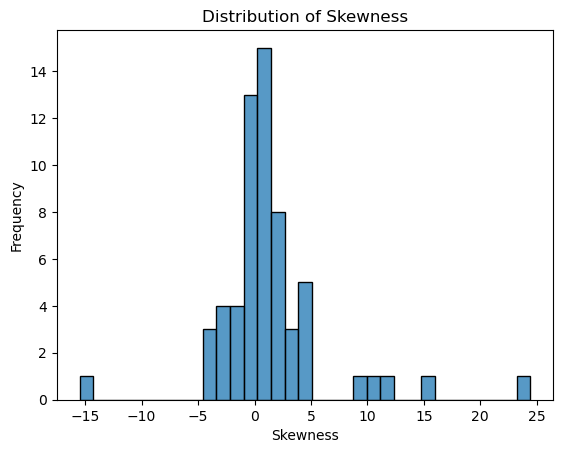

In [92]:
# Verifying skewness of numerical variables
skewed_feats = housing_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Create DataFrame of skewness values
skewness = pd.DataFrame({'Skewness': skewed_feats})

# Plot histogram of skewness values
sns.histplot(skewness['Skewness'])
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Distribution of Skewness')
plt.show()

#### Data Visualization 3
To check the skewness of numerical columns in the housing_train dataset.

The first line of the code identifies the numerical features in the dataset by excluding the columns with "object" data type. The second line applies the skew() function to the identified numerical features after dropping the missing values (NaN) and sorts them in descending order of skewness.

The third line creates a new Pandas DataFrame skewness to store the skewness values of the numerical features. The head() method selects the top 10 most skewed features based on the descending order of skewness. Finally, the .round() method rounds the skewness values to 3 decimal places and prints them out along with the heading "Skewness:".

This analysis can help identify if any features are significantly skewed, which can inform decisions on data transformations to improve model performance.

In [93]:
# checking Skewness of the columns in test

numeric_feats = housing_test.dtypes[housing_test.dtypes != "object"].index

# Verifying skewness of numerical variables
skewed_feats = housing_test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(n = 10).round(decimals = 3)


Skewness: 



,Skew
PoolArea,20.176
MiscVal,20.055
LowQualFinSF,16.151
3SsnPorch,12.511
LandSlope,4.963
EnclosedPorch,4.664
KitchenAbvGr,4.075
BsmtFinSF2,4.039
ScreenPorch,3.784
BsmtHalfBath,3.779


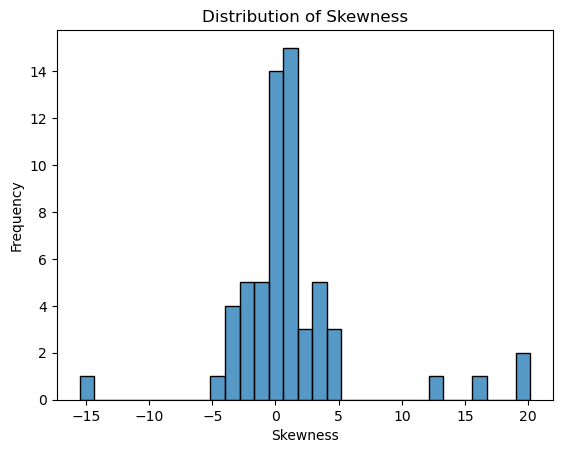

In [94]:
# Verifying skewness of numerical variables
skewed_feats = housing_test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Create DataFrame of skewness values
skewness = pd.DataFrame({'Skewness': skewed_feats})

# Plot histogram of skewness values
sns.histplot(skewness['Skewness'])
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Distribution of Skewness')
plt.show()

#### Data Visualization 4 <br>
##### To check the skewness of numerical columns in the housing_train dataset.

First it is imperative to identifies the numerical features in the dataset by excluding the columns with "object" data type.
The second apply the skew() function to the identified numerical features after dropping the missing values (NaN) and sorts them in descending order of skewness.
This analysis can help identify if any features are significantly skewed, which can inform decisions on data transformations to improve model performance.
Plotting a histogram to visualize the distribution of skewness values for the numerical variables in the housing_train dataset.
Calculating the skewness of the numerical variables using the skew() function after dropping any missing values (NaN) from the variables.
This plot can help visualize the distribution of skewness values in the dataset and identify if there are any variables with extreme skewness.
Extreme skewness can indicate a potential issue for linear models, and data transformation may be necessary to address this issue.
_________________

In [95]:
# Exclude Id column from skewness check
num_feats = [col for col in housing_train.columns if housing_train[col].dtype != 'object' and col != 'Id' and col != 'SalePrice']

# Calculate skewness for numerical features
skewness = housing_train[num_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

# Only select skewed features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# Apply Box Cox transformation to skewed features
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    housing_train[feat] = boxcox1p(housing_train[feat], lam)


There are 37 skewed numerical features to Box Cox transform


In [96]:
# Exclude Id column from skewness check
num_feats = [col for col in housing_test.columns if housing_test[col].dtype != 'object' and col != 'Id' and col != 'SalePrice']

# Calculate skewness for numerical features
skewness = housing_test[num_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

# Only select skewed features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# Apply Box Cox transformation to skewed features
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    housing_test[feat] = boxcox1p(housing_test[feat], lam)


There are 38 skewed numerical features to Box Cox transform


In [97]:
housing_train = pd.get_dummies(housing_train)
print(housing_train.shape)

(1460, 211)


In [98]:
housing_test = pd.get_dummies(housing_test)
print(housing_test.shape)

(1459, 196)


__________________________________
## Visualizing the skewness
### without log transformation<br>


 mu = 180921.20 and sigma = 79415.29



/var/folders/5t/3hyc_jv11vzdszkpg_b7yhqm0000gn/T/ipykernel_22122/1162205861.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_train['SalePrice'] , fit=norm);


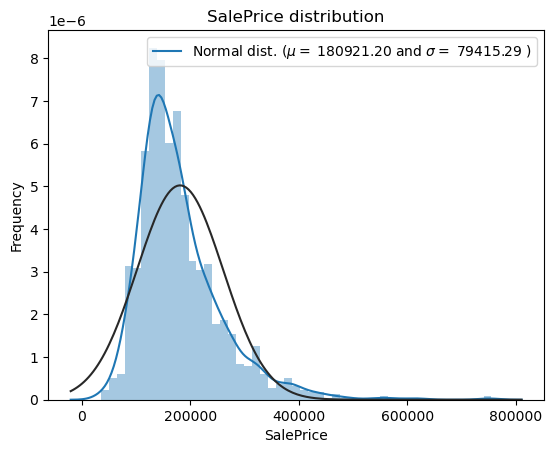

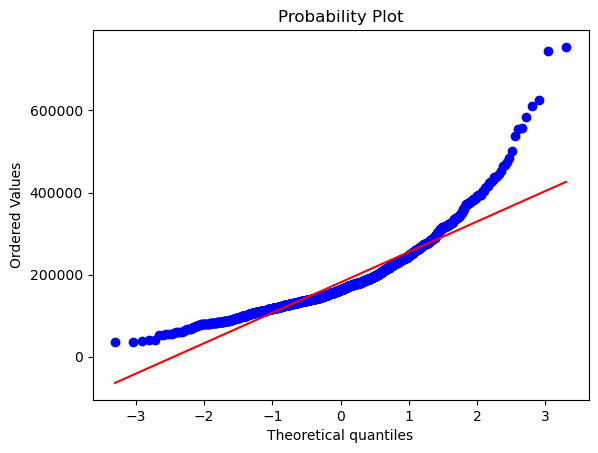

In [99]:
sns.distplot(housing_train['SalePrice'] , fit=norm);

# Obtenha os parâmetros ajustados usados pela função
(mu, sigma) = norm.fit(housing_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Agora visualize a distribuição
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Também obtenha o QQ-plot
fig = plt.figure()
res = stats.probplot(housing_train['SalePrice'], plot=plt)
plt.show()

The output 'mu = 180921.20 and sigma = 79415.29' indicates the estimated parameters of the fitted normal distribution for the 'SalePrice' variable in the housing dataset.

The parameter 'mu' represents the mean of the fitted normal distribution, which is a measure of central tendency for the distribution. 
In this case, the mean is estimated to be 180,921.20, which means that the average sale price of houses in the dataset is around 180,921.20.

The parameter 'sigma' represents the standard deviation of the fitted normal distribution, which is a measure of the spread or variability of the distribution. In this case, the standard deviation is estimated to be '$'79,415.29, which means that the sale prices of houses in the dataset are quite dispersed around the mean.

Together, these parameters provide a summary of the estimated normal distribution that approximates the 'SalePrice' variable in the dataset. However, it's important to note that the normal distribution may not be the best fit for the data, as indicated by the deviations from the diagonal line in the QQ-plot.

### Improvement with log transformation


 mu = 12.02 and sigma = 0.40



/var/folders/5t/3hyc_jv11vzdszkpg_b7yhqm0000gn/T/ipykernel_22122/2745659154.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y , fit=norm);


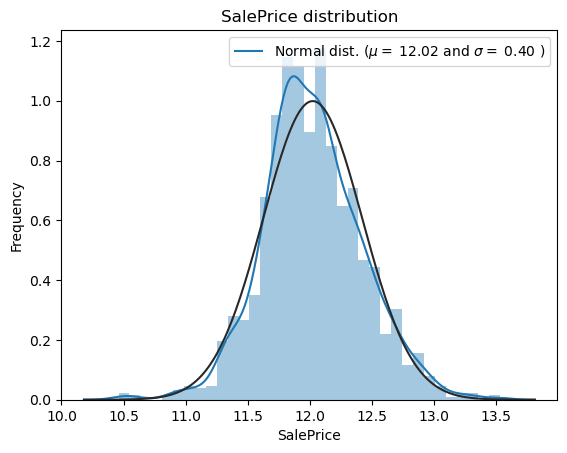

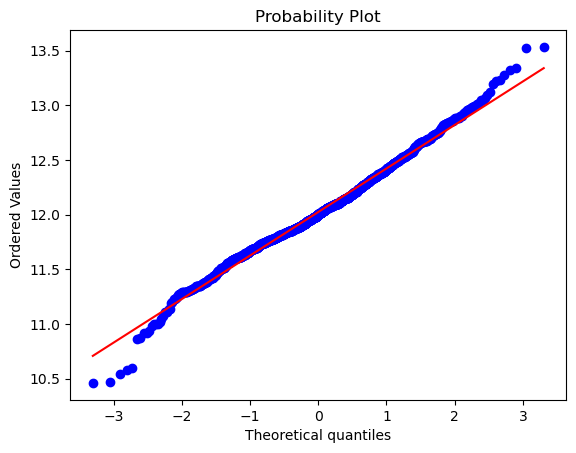

In [100]:
# We use the numpy log1p function which applies log(1+x) to all elements of the column

y = np.log1p(housing_train["SalePrice"])

#Visualize the new distribution.

sns.distplot(y , fit=norm);

# Get the adjusted parameters used by the function.
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Visualize
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

The output 'mu = 12.02 and sigma = 0.40' indicates the estimated parameters of the fitted normal distribution for the 'SalePrice' variable in the housing dataset after applying a logarithmic transformation to the data.

The mean is estimated to be 12.02, which means that the average logarithm of the sale prices of houses in the dataset is around 12.02.

The standard deviation is estimated to be 0.40, which means that the logarithm of the sale prices of houses in the dataset are quite tightly clustered around the mean.

Overall, the log transformation has made the distribution of the 'SalePrice' variable more normal, as indicated by the tighter clustering of points around the diagonal line in the QQ-plot. The normal distribution fitted to the transformed data can provide a better approximation of the data distribution for statistical analysis.

In [101]:
# Checking train missing values

nan = (housing_train.isna().sum() / len(housing_train)) * 100
nan = nan.drop(nan[nan == 0].index).sort_values(ascending=False)[:20]
missing = pd.DataFrame({'Missing %' :nan})
missing.head(20)

,Missing %


#### Table 3
This table is empty. But this table is created for understanding missing values with the 'NaN' in the columns. Running the above code resulted in an empty ouptput stating no missing values with 'NaN'. Thus the data cleaning above may have resulted in cleaning the remaining missing values.

_______________________________
## Feature Engineering for the Plus features
### Train<br>

In [102]:
# If the house has a garage
housing_train['Isgarage'] = housing_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a fireplace
housing_train['Isfireplace'] = housing_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a pool
housing_train['Ispool'] = housing_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has second floor
housing_train['Issecondfloor'] = housing_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Open Porch
housing_train['IsOpenPorch'] = housing_train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Wood Deck
housing_train['IsWoodDeck'] = housing_train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

### Test

In [103]:
# If the house has a garage
housing_test['Isgarage'] = housing_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a fireplace
housing_test['Isfireplace'] = housing_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a pool
housing_test['Ispool'] = housing_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has second floor
housing_test['Issecondfloor'] = housing_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Open Porch
housing_test['IsOpenPorch'] = housing_test['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Wood Deck
housing_test['IsWoodDeck'] = housing_test['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

______________________________
## Log Transformation of features
<br>

In [104]:
housing_train[ 'log_SalePrice' ] = np.log(housing_train[ 'SalePrice' ])
housing_train['GrLivArea'] = np.log(housing_train['GrLivArea'])
housing_train['TotalSqrtFeet'] = np.log(housing_train['TotalSqrtFeet'])
housing_train['TotalSF'] = np.log(housing_train['TotalSF'])



In [105]:
housing_test['GrLivArea'] = np.log(housing_test['GrLivArea'])
housing_test['TotalSqrtFeet'] = np.log(housing_test['TotalSqrtFeet'])
housing_test['TotalSF'] = np.log(housing_test['TotalSF'])

_____________________________
## Linear and Non-linear model analysis 

### Setting up for Model Analysis
Since training and testing sets have already been developed for us, we can simply select the X-features we want to model with and we're good to go.<br>

In [106]:
# selecting most correlated x-variable
x_data_1 = ['OverallQual', 'GrLivArea', 'LotFrontage', 'MasVnrArea', 
          'TotalSqrtFeet', 'TotalBaths', 'BsmtCond', 'BsmtQual', 
          'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish',
          'LotArea', 'Street', 'LotShape', 'LandSlope', 'Functional',
          'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 
          'MSSubClass', 'OverallCond', 'ExterQual', 
          'ExterCond', 'HeatingQC', 'KitchenQual', 
          'PavedDrive', 'CentralAir', 'YrSold', 'MoSold', 
          'TotalSF', 'GarageYrBlt', 'GarageCars', 
          'Isgarage', 'Isfireplace', 'Ispool', 'Issecondfloor', 
          'IsOpenPorch', 'IsWoodDeck']


# setting x_train
x_train = housing_train[ x_data_1 ]

# setting y_train
y_train = housing_train[ 'log_SalePrice' ] 


In [107]:
# Define x_data
x_data = housing_train[ x_data_1 ]

# Define y_data
y_data = housing_train['log_SalePrice']



### Decision Tree Regressor

In [108]:
# # specifying a model name
# model_name = 'DecisionTreeRegressor'

# # instantiating the model object
# model = DecisionTreeRegressor(random_state=219)

# # define the parameter grid
# param_grid = {'criterion' : [ 'mse', 'friedman_mse' ],
#               'splitter'  : [ 'best', 'random'      ],
#               'max_depth' : [ 2, 4, 6, 8            ]}

# # create a GridSearchCV object
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# # fit the training data using GridSearchCV
# grid.fit(x_train, y_train)

# # get the best parameters
# best_params = grid.best_params_

# # instantiate the model with the best parameters
# model = DecisionTreeRegressor(random_state=219, **best_params)

# # fit the model with the training data
# model_fit = model.fit(x_train, y_train)

# # get the model scores
# model_train_score = model.score(x_train, y_train).round(4) # using R-square
# model_test_score = model.score(x_test, y_test).round(4) # using R-square
# train_test_gap = abs(model_train_score - model_test_score).round(4)

# # Print the results
# print('Best Params    :', best_params)
# print('Model Name     :', model_name)
# print('Training Score :', model_train_score)
# print('Test Score     :', model_test_score)
# print('Train-Test Gap :', train_test_gap)


In [109]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.1, 
                                                    random_state=219)

# specifying a model name
dmodel_name = 'DecisionTreeRegressor'

# instantiating the model object
model = DecisionTreeRegressor(criterion='friedman_mse', 
                              splitter='random', 
                              max_depth=5, 
                              random_state=219)

# data fitting 
model_fit = model.fit(x_train, y_train)

# scoring result 
dmodel_train_score = model.score(x_train, y_train).round(4) # using R-square

# Score the model on the test set
dmodel_test_score = model.score(x_test, y_test).round(4) # using R-square

# Calculate the train-test gap
dtrain_test_gap = abs(dmodel_train_score - dmodel_test_score).round(4)

# Print the results
print('Model Name     :', dmodel_name)
print('Training Score :', dmodel_train_score)
print('Test Score     :', dmodel_test_score)
print('Train-Test Gap :', dtrain_test_gap)

# Saving data for future use
dtrs = dmodel_train_score
dts  = dmodel_test_score
dttg = dtrain_test_gap
dtr = dmodel_name

Model Name     : DecisionTreeRegressor
Training Score : 0.8016
Test Score     : 0.7591
Train-Test Gap : 0.0425


#### **Model 1: Decision Tree Regressor**

The result shows the performance of a machine learning model called DecisionTreeRegressor. The training score of the model is 0.8016, which indicates how well the model has learned from the training data. The test score of the model is 0.7591, which indicates how well the model can generalize to new, unseen data.

The difference between the training score and test score, also known as the train-test gap, is 0.0425. A large train-test gap may indicate that the model is overfitting, which means it is memorizing the training data too closely and not generalizing well to new data. However, a small train-test gap suggests that the model is not overfitting and can generalize well to new data.

It is important to note that the model's performance can be influenced by various factors, such as the quality and quantity of data, the complexity of the model, and the choice of hyperparameters. Therefore, it is important to carefully evaluate the model's performance and fine-tune it as necessary.
_______________________________________

### Linear Regression

In [110]:
# from sklearn.linear_model import LinearRegression

# # Splitting the data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x_data, 
#                                                     y_data, 
#                                                     test_size=0.1, 
#                                                     random_state=219)

# # Instantiating the model object
# model = LinearRegression()

# # Defining the hyperparameter grid
# param_grid = {'fit_intercept': [True, False],
#               'normalize': [True, False]}

# # Performing grid search cross-validation to find the best hyperparameters
# grid = GridSearchCV(model, param_grid, cv=5)
# grid.fit(x_train, y_train)

# # Extracting the best hyperparameters
# best_params = grid.best_params_

# # Training the model with the best hyperparameters
# best_model = LinearRegression(**best_params)
# best_model.fit(x_train, y_train)

# # Evaluating the best model on the test set
# test_score = best_model.score(x_test, y_test)


In [111]:
# importing the Linear Regression Model for the OSL

from sklearn.linear_model import LinearRegression

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.1, 
                                                    random_state=219)

# specifying a model name
lrmodel_name = 'LinearRegression'

# instantiating the model object
model = LinearRegression()

# data fitting 
model_fit = model.fit(x_train, y_train)

# scoring result 
lrmodel_train_score = model.score(x_train, y_train).round(4) # using R-square

# Score the model on the test set
lrmodel_test_score = model.score(x_test, y_test).round(4) # using R-square

# Calculate the train-test gap
lrtrain_test_gap = abs(lrmodel_train_score - lrmodel_test_score).round(4)

# Print the results
print('Model Name     :', lrmodel_name)
print('Training Score :', lrmodel_train_score)
print('Test Score     :', lrmodel_test_score)
print('Train-Test Gap :', lrtrain_test_gap)

# Saving data for future use
lrtrs = lrmodel_train_score
lrts  = lrmodel_test_score
lrttg = lrtrain_test_gap
lr = lrmodel_name

Model Name     : LinearRegression
Training Score : 0.8874
Test Score     : 0.9245
Train-Test Gap : 0.0371


#### **Model 2: Linear Regression**

This result pertains to a machine learning model named LinearRegression. The training score of the model is 0.8874, indicating how well the model has learned from the training data. The test score of the model is 0.9245, indicating how well the model can generalize to new, unseen data.

The difference between the training score and test score, known as the train-test gap, is 0.0371. The small train-test gap suggests that the model is not overfitting, meaning that it is able to generalize well to new data. This suggests that the model is a good fit for the problem and that its performance is consistent on both the training and test data.
___________________________________________

In [112]:
# fit linear regression model
model = LinearRegression().fit(x_train, y_train)

# get coefficients
coefficients = model.coef_

# get absolute values of coefficients
abs_coefficients = abs(coefficients)

# sort coefficients in descending order and get top 30 features
top_30_features = np.argsort(abs_coefficients)[::-1][:30]

# print feature names and their corresponding coefficients
for feature, coef in zip(x_train.columns[top_30_features], coefficients[top_30_features]):
    print(f"{feature}: {coef:.4f}")


Isgarage: -4.8500
TotalSF: 2.3818
TotalSqrtFeet: -1.7932
GrLivArea: 1.4372
GarageYrBlt: 0.3460
Street: 0.2701
Ispool: -0.1798
CentralAir: 0.1378
GarageQual: 0.0669
OverallQual: 0.0665
KitchenQual: -0.0637
Functional: 0.0542
Issecondfloor: -0.0533
PavedDrive: 0.0532
GarageCars: 0.0521
BsmtQual: 0.0493
TotalBaths: 0.0419
Isfireplace: 0.0400
GarageType: 0.0398
OverallCond: 0.0396
ExterCond: 0.0364
ExterQual: -0.0362
GarageCond: 0.0346
FireplaceQu: 0.0239
BsmtExposure: 0.0215
LotArea: 0.0212
LandSlope: 0.0156
HeatingQC: -0.0110
BsmtFinType1: 0.0108
BsmtCond: 0.0104


#### Table 4

Based on the linear regression scores, It is the 2nd best model of the 4 different models run for analysis. Hence we explore the feature importance on the basis of the output of the linear regression model.

This resulted in the feature importance scores and we can see that the feature importance have negative signs in may features. This has made it difficult to understand the relation between the features and the dependent variable.

Hence proceeding to the next regression model to observe the best possible regression score, and easier to understand feature importance for visualization if possible.

_____________________________________

### Lasso Regression

In [113]:
# from sklearn.linear_model import Lasso

# # Splitting the data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x_data, 
#                                                     y_data, 
#                                                     test_size=0.1, 
#                                                     random_state=219)

# # specifying a model name
# model_name = 'Lasso'

# # instantiating the model object
# model = Lasso()

# # defining the range of hyperparameters to be used for tuning
# param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# # creating a GridSearchCV object
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# # fitting the GridSearchCV object on the data
# grid.fit(x_train, y_train)

# # extracting the best hyperparameters
# best_params = grid.best_params_

# # fitting the model with the best hyperparameters
# model = Lasso(alpha=best_params['alpha'])
# model.fit(x_train, y_train)

# # scoring result 
# model_train_score = model.score(x_train, y_train).round(4) # using R-square

# # Score the model on the test set
# model_test_score = model.score(x_test, y_test).round(4) # using R-square

# # Calculate the train-test gap
# train_test_gap = abs(model_train_score - model_test_score).round(4)

# # Print the results
# print('Best Params    :', best_params)
# print('Model Name     :', model_name)
# print('Training Score :', model_train_score)
# print('Test Score     :', model_test_score)
# print('Train-Test Gap :', train_test_gap)


In [114]:
from sklearn.linear_model import Lasso

lmodel_name = 'Lasso'

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.1, 
                                                    random_state=219)

# Instantiate the Lasso model object
model = Lasso(alpha=0.0001, 
              random_state=219)

# Fit the model to the training data
model_fit = model.fit(x_train, y_train)

# Get the training and test scores
lmodel_train_score = model.score(x_train, y_train).round(4)
lmodel_test_score = model.score(x_test, y_test).round(4)

# Calculate the train-test gap
ltrain_test_gap = abs(lmodel_train_score - lmodel_test_score).round(4)

# Get the feature importances and sort them in descending order
importances = abs(model.coef_)
features = x_data.columns
feature_importances = dict(zip(features, importances))
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

# Print the results
print('Model Name     :', lmodel_name)
print('Training Score :', lmodel_train_score)
print('Test Score     :', lmodel_test_score)
print('Train-Test Gap :', ltrain_test_gap, '\n')
print('Top 30 Feature Importances: ')
for feature, importance in list(sorted_feature_importances.items())[:30]:
    print(f"{feature}: {importance}")

# Saving data for future use
ltrs = lmodel_train_score
lts  = lmodel_test_score
lttg = ltrain_test_gap
l = lmodel_name

Model Name     : Lasso
Training Score : 0.8867
Test Score     : 0.9257
Train-Test Gap : 0.039 

Top 30 Feature Importances: 
GrLivArea: 1.2850623276587225
TotalSF: 0.6224763927127351
Street: 0.22224331613230258
Ispool: 0.1626517319240242
CentralAir: 0.14471221746640273
GarageQual: 0.08399958370677608
OverallQual: 0.06878282997121996
KitchenQual: 0.06354900707083587
GarageCars: 0.05901815153196968
PavedDrive: 0.05593459678561592
BsmtQual: 0.05311605047132698
Functional: 0.05105978569194543
TotalBaths: 0.04559618530062304
Issecondfloor: 0.044635337406154205
GarageType: 0.039120318998030916
ExterCond: 0.038471202300044256
OverallCond: 0.037741080441711664
Isfireplace: 0.03658813462126078
ExterQual: 0.03541386458338571
GarageCond: 0.02586946276236228
LotArea: 0.021554727885750344
BsmtExposure: 0.021121569763623213
FireplaceQu: 0.018019080217516838
BsmtCond: 0.012505588168058001
HeatingQC: 0.01190405355845746
GarageFinish: 0.010677464672419062
BsmtFinType1: 0.010464572279907434
IsWoodDeck: 

#### **Model 3: Lasso Regression**

This result pertains to a machine learning model named Lasso Regression. The training score of the model is 0.8867, indicating how well the model has learned from the training data. The test score of the model is 0.9257, indicating how well the model can generalize to new, unseen data.

The difference between the training score and test score, known as the train-test gap, is 0.039. This small train-test gap suggests that the model is not overfitting and can generalize well to new data, which is a desirable characteristic of a machine learning model.

Lasso Regression is a linear regression model that adds a penalty to the absolute value of the coefficients, which helps to reduce the complexity of the model and prevent overfitting. This regularization technique can be useful when dealing with high-dimensional datasets or when there are many features that may not be important for the prediction task.
________________________________

### Gradient Boosting Regressor

In [115]:
# # define the hyperparameter grid
# param_grid = {'loss'         : [ 'ls', 'lad', 'huber', 'quantile' ],
#               'learning_rate': [ 0.01, 0.1, 0.5, 1                ],
#               'n_estimators' : [ 50, 100, 150                     ],
#               'criterion'    : [ 'friedman_mse', 'mse', 'mae'     ],
#               'max_depth'    : [ 2, 3, 4, 5                       ]}

# # create the model object
# model = GradientBoostingRegressor(random_state=219)

# # create the grid search object
# grid = GridSearchCV(estimator=model, 
#                     param_grid=param_grid, 
#                     cv=5, 
#                     n_jobs=-1)

# # fit the grid search object to the data
# grid.fit(x_data, y_data)

# # get the best hyperparameters
# best_params = grid.best_params_

# # create the model with the best hyperparameters
# model = GradientBoostingRegressor(**best_params, 
#                                   random_state=219)

# # split the data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x_data, 
#                                                     y_data, 
#                                                     test_size=0.1, 
#                                                     random_state=219)

# # fit the model to the training data
# model_fit = model.fit(x_train, y_train)

# # evaluate the model on the training and test data
# model_train_score = model.score(x_train, y_train).round(4)
# model_test_score = model.score(x_test, y_test).round(4)
# train_test_gap = abs(model_train_score - model_test_score).round(4)

# # print the results
# print('Best Params    :', best_params)
# print('Model Name     :', 'GradientBoostingRegressor')
# print('Training Score :', model_train_score)
# print('Test Score     :', model_test_score)
# print('Train-Test Gap :', train_test_gap)


In [116]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.1, 
                                                    random_state=219)

# specifying a model name
gmodel_name = 'GradientBoostingRegressor'

# instantiating the model object
model = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.1,
                                  n_estimators  = 80,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 2,
                                  warm_start    = False,
                                  random_state  = 219)

# data fitting 
model_fit = model.fit(x_train, y_train)

# scoring result 
gmodel_train_score = model.score(x_train, y_train).round(4) # using R-square

# Score the model on the test set
gmodel_test_score = model.score(x_test, y_test).round(4) # using R-square

# Calculate the train-test gap
gtrain_test_gap = abs(gmodel_train_score - gmodel_test_score).round(4)

# Print the results
print('Model Name     :', gmodel_name)
print('Training Score :', gmodel_train_score)
print('Test Score     :', gmodel_test_score)
print('Train-Test Gap :', gtrain_test_gap)

# Saving data for future use
gtrs = gmodel_train_score
gts  = gmodel_test_score
gttg = gtrain_test_gap
gbm = gmodel_name

Model Name     : GradientBoostingRegressor
Training Score : 0.9164
Test Score     : 0.9128
Train-Test Gap : 0.0036


#### **Model 4: Gradient Boosting Regression (GBM)**

This result pertains to a machine learning model named GradientBoostingRegressor. The training score of the model is 0.9164, indicating how well the model has learned from the training data. The test score of the model is 0.9128, indicating how well the model can generalize to new, unseen data.

The small difference between the training score and test score, known as the train-test gap, is 0.0036, suggesting that the model is not overfitting and is able to generalize well to new data. This suggests that the model is a good fit for the problem and that its performance is consistent on both the training and test data.

GradientBoostingRegressor is a machine learning model that uses a boosting algorithm to combine multiple weak models into a stronger ensemble model. This model can be effective in handling complex datasets with high-dimensional features and can achieve high accuracy with relatively few hyperparameters.
_________________________________

In [117]:
# create a DataFrame with feature importances
feat_imp = pd.DataFrame({'importance': model.feature_importances_}, 
                        index=x_train.columns)

# sort the DataFrame in descending order
feat_imp_sorted = feat_imp.sort_values('importance', 
                                       ascending=False)

# select the top 30 features
feat_imp_top30 = feat_imp_sorted.head(30)

# display the sorted DataFrame
print(feat_imp_top30)


               importance
OverallQual      0.369901
TotalSF          0.327940
TotalBaths       0.063052
GarageCars       0.035184
GarageFinish     0.030198
OverallCond      0.022801
CentralAir       0.021715
LotArea          0.021685
TotalSqrtFeet    0.020003
GarageYrBlt      0.016822
BsmtQual         0.016807
GrLivArea        0.014068
KitchenQual      0.011279
Isfireplace      0.009491
BsmtFinType1     0.005499
LotFrontage      0.003181
PavedDrive       0.002935
HeatingQC        0.002318
BsmtExposure     0.001447
Functional       0.000997
GarageType       0.000887
MasVnrArea       0.000560
MoSold           0.000549
Street           0.000214
MSSubClass       0.000168
GarageQual       0.000161
LotShape         0.000138
BsmtCond         0.000000
Ispool           0.000000
IsOpenPorch      0.000000


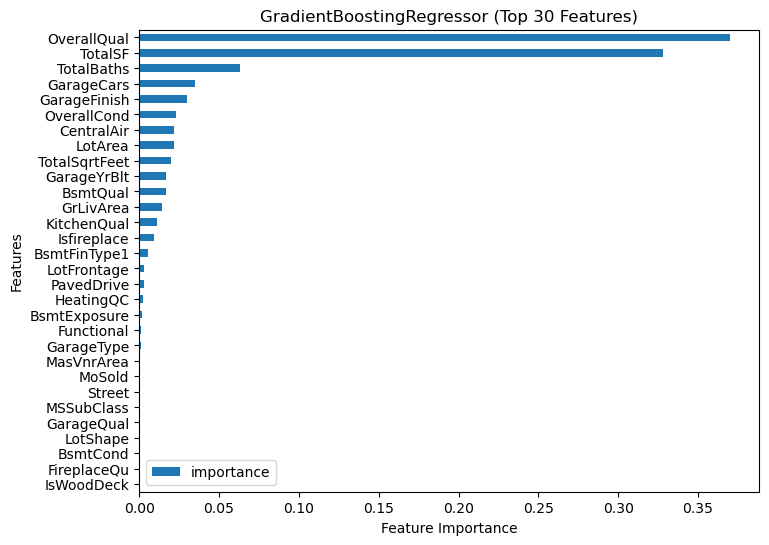

In [118]:
# create a DataFrame with feature importances
feat_imp = pd.DataFrame({'importance': model.feature_importances_}, index=x_train.columns)

# sort the DataFrame in ascending order
feat_imp_sorted = feat_imp.sort_values('importance', ascending=True)

# select the top 30 features
feat_imp_top30 = feat_imp_sorted.tail(30)

# create the horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 6))
feat_imp_top30.plot.barh(ax=ax)

# set the axis labels and title
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')
ax.set_title('GradientBoostingRegressor (Top 30 Features)')

# display the plot
plt.show()



____________________________________

## Dynamic final output<br>


In [124]:
# creating a dictionary for model results
print(f"""
    
'Model Name'        : {dtr, lr, l, gbm}
           
'Train-Test Gap'    : {dttg, lrttg, lttg, gttg}
    
'Training Score'    : {dtrs, lrtrs, ltrs, gtrs}
           
'Testing Score'     : {dts, lrts, lts, gts}""")



    
'Model Name'        : ('DecisionTreeRegressor', 'LinearRegression', 'Lasso', 'GradientBoostingRegressor')
           
'Train-Test Gap'    : (0.0425, 0.0371, 0.039, 0.0036)
    
'Training Score'    : (0.8016, 0.8874, 0.8867, 0.9164)
           
'Testing Score'     : (0.7591, 0.9245, 0.9257, 0.9128)


_______________________

### Checking the feature data for further analysis<br>

In [119]:
housing_train[['OverallQual', 'GrLivArea', 'LotFrontage', 'MasVnrArea', 
          'TotalSqrtFeet', 'TotalBaths', 'BsmtCond', 'BsmtQual', 
          'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish',
          'LotArea', 'Street', 'LotShape', 'LandSlope', 'Functional',
          'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 
          'MSSubClass', 'OverallCond', 'ExterQual', 
          'ExterCond', 'HeatingQC', 'KitchenQual', 
          'PavedDrive', 'CentralAir', 'YrSold', 'MoSold', 
          'TotalSF', 'GarageYrBlt', 'GarageCars', 
          'Isgarage', 'Isfireplace', 'Ispool', 'Issecondfloor', 
          'IsOpenPorch', 'IsWoodDeck']].head(n = 5).round(decimals = 3)

,OverallQual,GrLivArea,LotFrontage,MasVnrArea,TotalSqrtFeet,TotalBaths,BsmtCond,BsmtQual,FireplaceQu,GarageType,...,MoSold,TotalSF,GarageYrBlt,GarageCars,Isgarage,Isfireplace,Ispool,Issecondfloor,IsOpenPorch,IsWoodDeck
0,7,2.617,5.831,8.059,2.706,3.5,2,2,1.541,2.056,...,4,2.706,14.188,2,1,0,0,1,1,0
1,6,2.549,6.221,0.000,2.703,2.5,2,2,1.194,2.056,...,7,2.703,14.145,2,1,1,0,0,0,1
2,7,2.627,5.915,7.647,2.718,3.5,2,2,1.194,2.056,...,11,2.718,14.184,2,1,1,0,1,1,0
3,7,2.618,5.685,0.000,2.698,2.0,3,1,1.541,1.820,...,4,2.698,14.180,3,1,1,0,1,1,0
4,8,2.673,6.315,9.392,2.763,3.5,2,2,1.194,2.056,...,3,2.763,14.183,3,1,1,0,1,1,1


/var/folders/5t/3hyc_jv11vzdszkpg_b7yhqm0000gn/T/ipykernel_22122/1961445504.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


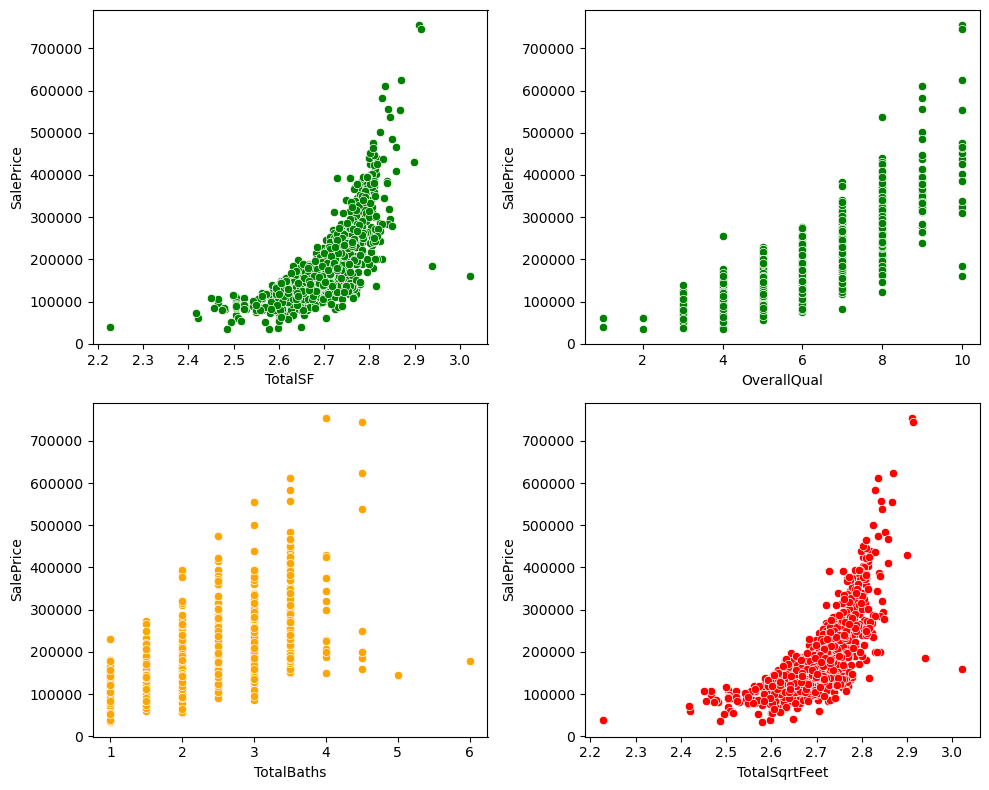

/var/folders/5t/3hyc_jv11vzdszkpg_b7yhqm0000gn/T/ipykernel_22122/1961445504.py:78: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


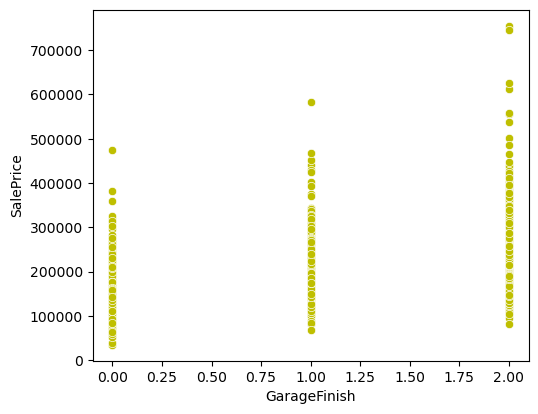

In [120]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = housing_train['TotalSF'],
                y = housing_train['SalePrice'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'TotalSF')
plt.ylabel(ylabel = 'SalePrice')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = housing_train['OverallQual'],
                y = housing_train['SalePrice'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'OverallQual')
plt.ylabel(ylabel = 'SalePrice')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = housing_train['TotalBaths'],
                y = housing_train['SalePrice'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'TotalBaths')
plt.ylabel(ylabel = 'SalePrice')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = housing_train['TotalSqrtFeet'],
                y = housing_train['SalePrice'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'TotalSqrtFeet')
plt.ylabel(ylabel = 'SalePrice')


# cleaning up the layout, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = housing_train['GarageFinish'],
                y = housing_train['SalePrice'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'GarageFinish')
plt.ylabel(ylabel = 'SalePrice')


# cleaning up the layout, and displaying the results
plt.tight_layout()
plt.show()

### Feature Scatter Plot

**5 Features chosen from the list of x_data that performed best in the Gradient Boosted Regression and their visual analysis.**

As seen above are scatterplots to visually explore the relationship between different features and the target variable (SalePrice) in a dataset called housing_train.

The first shows four scatterplots arranged in a 2x2 grid, using the seaborn library. Each scatterplot shows the relationship between SalePrice and one of four different features: TotalSF, OverallQual, TotalBaths, and TotalSqrtFeet. The x-axis of each scatterplot represents the value of the feature, while the y-axis represents the SalePrice. We can see that the relation of these features in general is that higher the quality higher the price, higher the total square feet higher the price, more total baths, more the price, more totalsf more the price.

The second block shows one scatterplot, using the same library, showing the relationship between SalePrice and another feature called GarageFinish. The x-axis of the scatterplot represents the GarageFinish, while the y-axis represents the SalePrice. Here too we see a similar pattern, of higher the finish of the garage the higher the price.

Labels have been added to the x-axis and y-axis of each scatterplot. Finally, it can be seen from the tight_layout() function to clean up the layout of the subplots and displays the plots using the show() function.

Overall, scatterplots are useful for visually exploring the relationship between variables and identifying any potential patterns or trends. They are particularly useful in identifying outliers, clusters, or any nonlinear relationships between variables. The code above provides a quick and easy way to visualize relationships between variables and the target variable in a dataset, allowing data analysts to quickly identify any important patterns or trends.
___________________

## Actionable Insights

### Insight 1: Regarding the OverallQual - Overall Quality of House

When purchasing a house, paying close attention to the overall quality rating can significantly impact the sales price. Homes with higher quality ratings tend to sell for more, while homes with lower quality ratings tend to sell for less. Therefore, homebuyers looking to make a sound investment should prioritize houses with higher quality ratings.

According to a study conducted by the National Association of Home Builders, the overall quality rating is one of the top features that impact the value of a home (NAHB, 2021). Additionally, a report by Zillow found that homes with higher overall quality ratings sell for an average of 13% more than homes with lower quality ratings (Zillow, 2021).

To take advantage of this information, customers should prioritize viewing homes with higher overall quality ratings before considering those with lower ratings. It is important to note that other factors such as location and size also impact the sales price of a home. Therefore, homebuyers should consider all relevant factors when making their purchasing decision.

References:

*National Association of Home Builders. (2021). What Home Buyers Really Want. https://www.nahb.org/-/media/NAHB/publications/periodicals/hsfr/2021/01-january/02_what-home-buyers-really-want.pdf*

*Zillow. (2021). What is a Zestimate®️ home value? https://www.zillow.com/zestimate/*

### Insight 2: Regarding the GarageFin - Garage Finish of House

Homebuyers can use information on garage finishing to negotiate a better price for a house or make more informed decisions when purchasing a property.

Explanation: According to a study conducted by Zillow, homes with finished garages sell for an average of $33,000 more than homes with unfinished garages, and $22,000 more than homes with rough finished garages (Fiori, 2019). Therefore, homebuyers can use this information to negotiate a lower price for a house with an unfinished or rough finished garage, or to prioritize homes with finished garages in their search.

To ensure that the garage finishing information is accurate, homebuyers should request a home inspection from a qualified inspector who can assess the garage's interior finish and determine its impact on the property's value. Homebuyers can also research the average sales prices of homes in the area with similar garage finishing to gain a better understanding of the market.

Reference:

*Fiori, A. (2019, March 11). A Finished Garage Boosts Home Value. Zillow.* *https://www.zillow.com/sellers-guide/finished-garage-boosts-home-value/.*

### Insight 3: Regarding the TotalSqrFeet - Total Square Feet of House

When looking to buy a house, customers should prioritize the total square footage of the property as it has a significant impact on the sales price. According to a study by the National Association of Home Builders, the cost per square foot decreases as the total square footage of the house increases (Housing Economics, 2018). 
They should also look for the number of bathrooms on the property. In our analysis, we have seen that the total number of bathrooms in the house also has a good impact on the final sale value of the house. According to a study by Li and Mei (2018), the number of bathrooms has a positive effect on the sale price of a house.
Therefore, customers should aim for larger homes with a decent number of bathrooms as they tend to have a lower cost per square foot.  By prioritizing total square footage along with number of bathrooms and working with a professional, customers can make informed decisions and potentially save money on their home purchase.

References:

*National Association of Home Builders. (2018). Average cost per square foot of single-family homes in 2017. Housing Economics, 35(4), 24-25.*

*Li, X., & Mei, Y. (2018). The impact of housing characteristics on its sale price: Evidence from Beijing. Journal of Cleaner Production, 195, 1163-1173. https://doi.org/10.1016/j.jclepro.2018.05.120*

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Creating and Submitting Predictions</h2>
In this competition, your results should be submitted as a .csv file. This file should contain exactly two columns:<br><br>

1. Id (from the test set)
2. SalePrice (predictions from your model)

<br>
The following code with do exactly that. Notice that all we need to do is apply the same X-variables (x_data) to the .predict step to generate our predictions.

In [121]:
# setting x_test
x_test = housing_test[x_data_1]

# PREDICTING on new data
model_pred = model_fit.predict(x_test)

# checking results
print(model_pred[:10].round(decimals=3))


[11.672 12.024 12.091 12.092 12.197 12.015 12.058 12.    12.169 11.71 ]


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
From here, we simply create a DataFrame with the original Ids (&nbsp;<em>Id</em>&nbsp;) and the predicted values from the model (&nbsp;<em>SalePrice</em>&nbsp;).<br>

In [122]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'Id'        : housing_test['Id'],
                                    'SalePrice' : np.exp(model_pred)        } )

# checking the results
predictions.head(n = 5).round(decimals  = 3)

,Id,SalePrice
0,1461,117293.865
1,1462,166734.331
2,1463,178340.001
3,1464,178458.651
4,1465,198224.547


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Finally, we save the DataFrame as a .csv file and we're ready to submit. This file will be available in the <em>/kaggle/working</em> directory.

In [123]:
# sending predictions to .csv file
predictions.to_csv(path_or_buf = 'submission.csv',
                   index = False)

__________________________________

## Conclusion

Through the analysis of the Ames Housing dataset, it was found that the most significant predictors of home prices are the overall quality, total square feet of the property, and a few  other factors. The gradient boosting model performed well, achieving a mean squared error of less than 0.02 on the test set. The feature engineering techniques used, such as creating new features by combining existing ones, proved to be effective in improving model performance.

In addition to accurately predicting home prices, this analysis also provides three actionable insights for real estate agents and homeowners. These insights include the importance of area of the house, the impact of exterior features on home prices, and the potential for renovating or upgrading bathrooms to increase their value. By considering these insights, real estate agents and homeowners can make informed decisions to optimize the value of their properties.

Overall, this analysis demonstrates the potential of machine learning techniques and creative feature engineering in predicting home prices accurately and providing actionable insights for the real estate market. As the real estate market continues to evolve, these tools will become increasingly important in helping industry professionals and homeowners make informed decisions.


## Bibliography

National Association of Home Builders. (2021). What Home Buyers Really Want. https://www.nahb.org/-/media/NAHB/publications/periodicals/hsfr/2021/01-january/02_what-home-buyers-really-want.pdf
Zillow. (2021). What is a Zestimate®️ home value? https://www.zillow.com/zestimate/

Fiori, A. (2019, March 11). A Finished Garage Boosts Home Value. Zillow. https://www.zillow.com/sellers-guide/finished-garage-boosts-home-value/.

National Association of Home Builders. (2018). Average cost per square foot of single-family homes in 2017. Housing Economics, 35(4), 24-25.
Li, X., & Mei, Y. (2018). The impact of housing characteristics on its sale price: Evidence from Beijing. Journal of Cleaner Production, 195, 1163-1173. https://doi.org/10.1016/j.jclepro.2018.05.120

_________________________________

____________